<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [11]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [12]:
import numpy as np
import matplotlib.pyplot as plt

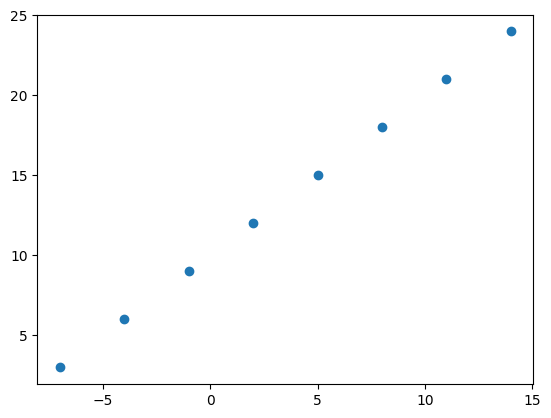

In [13]:
# Creating features

x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(x, y);

In [14]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [15]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [17]:
x[0], y[0]

(-7.0, 3.0)

In [18]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [19]:
x[0].ndim

0

In [28]:
# Turn our Numpy arrays into tensors with dtype 32

X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), ())

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)

3. Fitting a model - letting the model try to find patters between X & y (features and labels)

In [23]:
# Opetionally, the first layer can receive an 'input_shape' argument :
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# Afterwards, we do automatic shape inference :
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# ...

In [36]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 344ms/step - loss: 9.8886 - mae: 9.8886
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 9.7561 - mae: 9.7561
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 9.6236 - mae: 9.6236
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 9.4911 - mae: 9.4911
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 9.3586 - mae: 9.3586


In [31]:
# Check our X and Y
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [37]:
# Try make prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[20.566216]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - ere we might add more layers, increse the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might chang ethe optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn form)

In [44]:
# Let's rebuild our model

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model1.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 340ms/step - loss: 20.6240 - mae: 20.6240
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 20.3428 - mae: 20.3428
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 20.0615 - mae: 20.0615
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 19.7803 - mae: 19.7803
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 19.4990 - mae: 19.4990
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 19.2178 - mae: 19.2178
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 18.9365 - mae: 18.9365
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 18.6553 - mae: 18.6553
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 18.3740 - mae: 18.3740
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 18.0928 - mae: 18.0928
Epoch 11/100
1/1 [==============================

In [45]:
# Try make prediction
model1.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[29.248142]], dtype=float32)